<a href="https://colab.research.google.com/github/sara87821/20210602/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千

In [6]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
# DataFrame: 表格. Series: 一行/一列. 
df = pd.DataFrame(boston["data"], 
                  columns=boston["feature_names"])
df["ans"] = boston["target"]
df.to_csv("boston.csv", encoding="utf-8", index=False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
# sklearn前: pandas.DataFrame
# sklearn後: np.array
import numpy as np
from sklearn.model_selection import train_test_split
x, y = np.array(df.drop(["ans"], axis=1)), np.array(df["ans"])
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 13)
(51, 13)
(455,)
(51,)


In [8]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)#要調的參數
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(292.95, 498.3, 'RM <= 6.941\nmse = 81.727\nsamples = 455\nvalue = 22.626'),
 Text(130.20000000000002, 407.70000000000005, 'LSTAT <= 14.395\nmse = 35.822\nsamples = 382\nvalue = 19.896'),
 Text(49.6, 317.1, 'RM <= 6.543\nmse = 20.581\nsamples = 229\nvalue = 23.15'),
 Text(24.8, 226.5, 'DIS <= 1.207\nmse = 12.725\nsamples = 182\nvalue = 21.893'),
 Text(12.4, 135.89999999999998, 'mse = 0.0\nsamples = 1\nvalue = 50.0'),
 Text(37.2, 135.89999999999998, 'LSTAT <= 7.555\nmse = 8.407\nsamples = 181\nvalue = 21.738'),
 Text(24.8, 45.299999999999955, 'mse = 3.119\nsamples = 37\nvalue = 24.127'),
 Text(49.6, 45.299999999999955, 'mse = 7.923\nsamples = 144\nvalue = 21.124'),
 Text(74.4, 226.5, 'DIS <= 1.684\nmse = 21.217\nsamples = 47\nvalue = 28.015'),
 Text(62.0, 135.89999999999998, 'mse = 0.0\nsamples = 1\nvalue = 50.0'),
 Text(86.8, 135.89999999999998, 'TAX <= 269.0\nmse = 10.943\nsamples = 46\nvalue = 27.537'),
 Text(74.4, 45.299999999999955, 'mse = 4.869\nsamples = 14\nvalue = 30.2'),


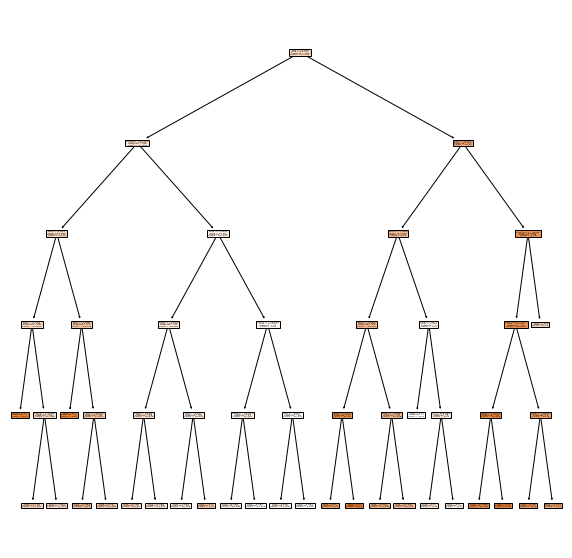

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(reg, 
          feature_names=boston["feature_names"],
          filled=True)

In [10]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test,pre)
# 回頭調參數

0.7844274870226693